Run all the cells and make changes to only the allowed cells. Do not change the code in the restricted region

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
import os
import shutil

# Paths
dataset_path = "Dataset"  # Path to the main Dataset folder
output_train_path = os.path.join(dataset_path, "train")
output_test_path = os.path.join(dataset_path, "test")

# Ensure train and test directories exist
os.makedirs(output_train_path, exist_ok=True)
os.makedirs(output_test_path, exist_ok=True)

# Function to process train/test sets and reorganize data
def process_dataset(crop_folder):
    # Path to test_set and train_set
    test_set_path = os.path.join(dataset_path, crop_folder, "test_set")
    train_set_path = os.path.join(dataset_path, crop_folder, "train_set")
    
    # Process test_set
    if os.path.exists(test_set_path):
        for disease_folder in os.listdir(test_set_path):
            source_path = os.path.join(test_set_path, disease_folder)
            if os.path.isdir(source_path):
                # Create combined folder name with disease first
                combined_class_name = f"{disease_folder}_{crop_folder}"
                destination_path = os.path.join(output_test_path, combined_class_name)
                os.makedirs(destination_path, exist_ok=True)
                
                # Move all images
                for file in os.listdir(source_path):
                    shutil.move(os.path.join(source_path, file), os.path.join(destination_path, file))

    # Process train_set
    if os.path.exists(train_set_path):
        for disease_folder in os.listdir(train_set_path):
            source_path = os.path.join(train_set_path, disease_folder)
            if os.path.isdir(source_path):
                # Create combined folder name with disease first
                combined_class_name = f"{disease_folder}_{crop_folder}"
                destination_path = os.path.join(output_train_path, combined_class_name)
                os.makedirs(destination_path, exist_ok=True)
                
                # Move all images
                for file in os.listdir(source_path):
                    shutil.move(os.path.join(source_path, file), os.path.join(destination_path, file))

# Iterate through all crop directories
for crop_folder in os.listdir(dataset_path):
    crop_folder_path = os.path.join(dataset_path, crop_folder)
    if os.path.isdir(crop_folder_path) and "test_set" in os.listdir(crop_folder_path):
        print(f"Processing {crop_folder}...")
        process_dataset(crop_folder)

train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')
print("Dataset restructuring complete!")


Processing Cashew...
Processing Cassava...
Processing Maize...
Processing Tomato...
Dataset restructuring complete!


In [5]:
train_data = ImageDataGenerator(rescale=1.0/255) 
test_data = ImageDataGenerator(rescale=1.0/255)


train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'    
)

test_generator = test_data.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

print("Classes found in the dataset:", train_generator.class_indices)

# Do not change this code

Found 74317 images belonging to 22 classes.
Found 24981 images belonging to 22 classes.
Classes found in the dataset: {'anthracnose_Cashew': 0, 'bacterial blight_Cassava': 1, 'brown spot_Cassava': 2, 'fall armyworm_Maize': 3, 'grasshoper_Maize': 4, 'green mite_Cassava': 5, 'gumosis_Cashew': 6, 'healthy_Cashew': 7, 'healthy_Cassava': 8, 'healthy_Maize': 9, 'healthy_Tomato': 10, 'leaf beetle_Maize': 11, 'leaf blight_Maize': 12, 'leaf blight_Tomato': 13, 'leaf curl_Tomato': 14, 'leaf miner_Cashew': 15, 'leaf spot_Maize': 16, 'mosaic_Cassava': 17, 'red rust_Cashew': 18, 'septoria leaf spot_Tomato': 19, 'streak virus_Maize': 20, 'verticulium wilt_Tomato': 21}


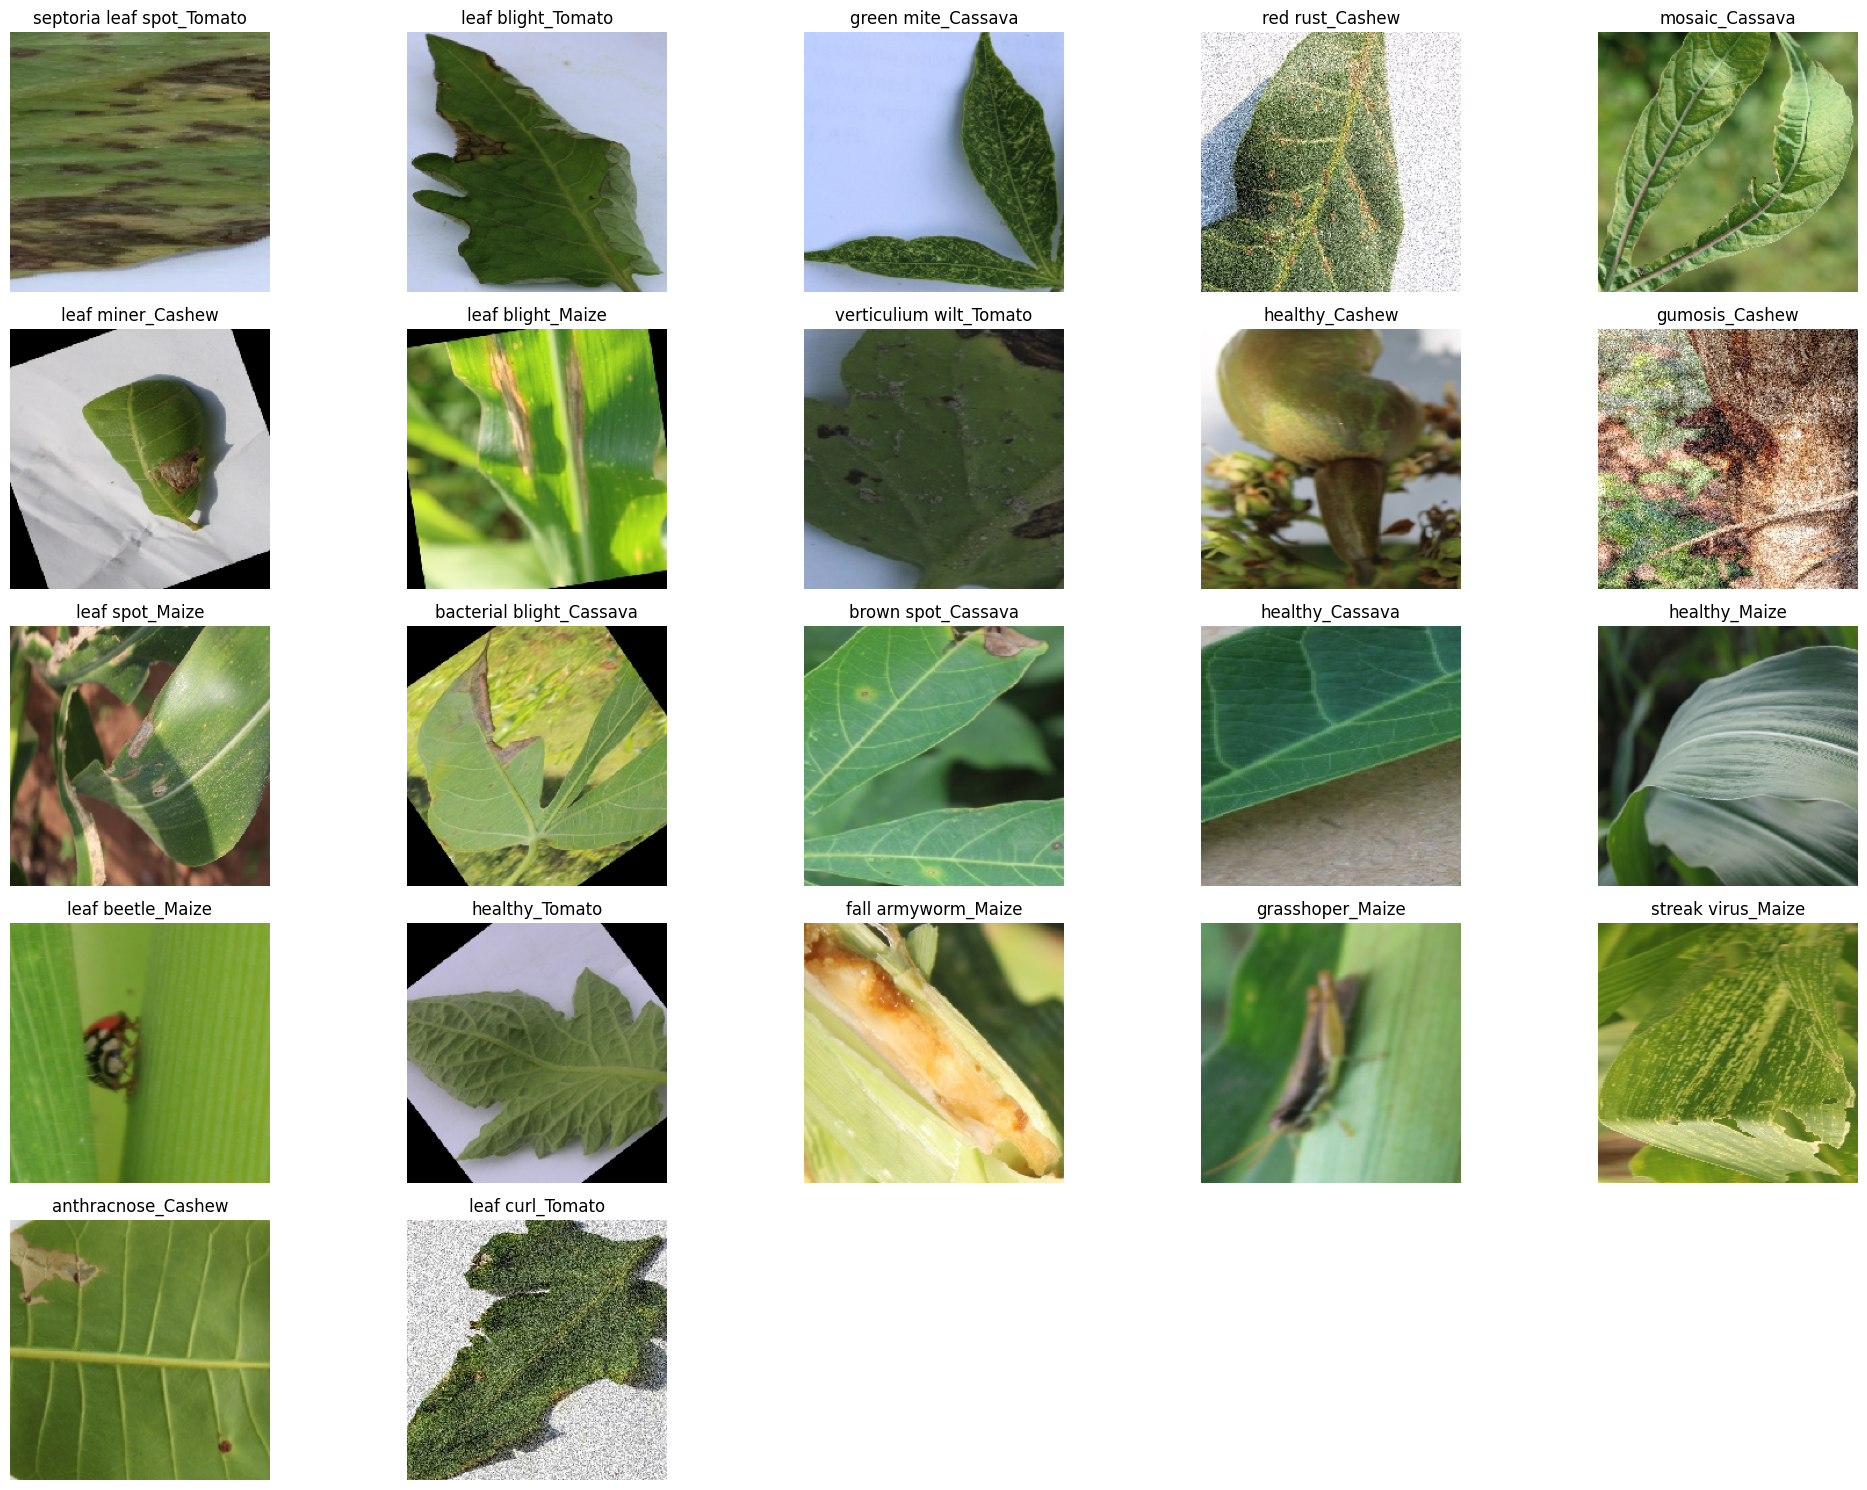

In [6]:
# Write the code to display one image of all the 22 classes.

import matplotlib.pyplot as plt
import numpy as np

# Display one image from each class
def display_images_per_class(generator, class_indices):
    # Reverse the class_indices dictionary to map indices to class names
    index_to_class = {v: k for k, v in class_indices.items()}
    
    # Dictionary to track whether we have displayed an image for each class
    displayed_classes = set()
    
    # Create a figure to display the images
    plt.figure(figsize=(20, 15))
    images_displayed = 0  # Counter to track number of displayed images
    
    # Loop through batches until all classes are displayed
    for batch_images, batch_labels in generator:
        for i in range(len(batch_images)):
            # Get the label index and the class name
            label_index = np.argmax(batch_labels[i])
            class_name = index_to_class[label_index]
            
            # Check if this class has already been displayed
            if class_name not in displayed_classes:
                displayed_classes.add(class_name)
                
                # Plot the image
                plt.subplot(5, 5, images_displayed + 1)  # 5x5 grid for 22 images
                plt.imshow(batch_images[i])
                plt.title(class_name)
                plt.axis('off')
                
                images_displayed += 1
                
                # Stop if we have displayed all 22 classes
                if len(displayed_classes) == len(class_indices):
                    plt.tight_layout()
                    plt.show()
                    return
        
        # Stop looping if all classes are displayed
        if len(displayed_classes) == len(class_indices):
            break

# Call the function to display one image per class
display_images_per_class(train_generator, train_generator.class_indices)



Run all the cells and the output must be clearly visible for all the cells.